# Example using k means clustering and PCA
In this file we use the Wine dataset from sklearn to test the k means clustering and PCA algorithims implemented in rice_ml

In this notebook we conduct the following: 

1. **Load the Wine dataset into a Pandas DataFrame** and print column headers and first few rows to better understand the data
2. **Use the rice_ml.unsupervised_learning.pca implementation** (`pca.py`) to reduce the data into a **2D** space.
3. **Plot the 2D PCA visualization colored by the *true* Wine class tags** (the labels that come with the **load_wine** dataset).
4. **Run the rice_ml.unsupervised_learning.k_means_clustering** algorithim (`k_means_clustering.py`) on the **2D PCA representation** and visualize the resulting clusters.



Here we load `numpy`, `pandas`, `matplotlib.pyplot` and `sklearn.datasets` to help us with this notebook.

We import `pca` and `k_means_clustering` from `rice_ml.unsupervised_learning`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.metrics import adjusted_rand_score

# Your implementations (uploaded alongside this notebook)
from rice_ml.unsupervised_learning.pca import pca
from rice_ml.unsupervised_learning.k_means_clustering import k_means_clustering


## 1) — Load the Wine dataset into a DataFrame

### What we're doing
- We load the Wine dataset from scikit-learn.
- We build a **Pandas DataFrame** where:
  - each row is a wine sample (a bottle / measurement)
  - each column is a numeric feature (chemical measurement)
- We also keep the dataset's **tag/label** (`target`) which indicates the true class.




In [2]:
wine = load_wine()
X = wine.data
y = wine.target

# Build a DataFrame with proper column names
df = pd.DataFrame(X, columns=wine.feature_names)

print('Column headers:')
print(df.columns.tolist())

print('\nFirst 5 rows of wine dataset:')
df.head()

Column headers:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

First 5 rows of wine dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 2) Use PCA to get a 2D representation

Working in **2D** will help us better visualize the data

### What we're doing
- We set `n_components=2` so PCA returns **two principal components**.
- We call `fit_transform(X)` to:
  1) fit PCA on the Wine features, and
  2) transform the data into the new 2D coordinate system.

### Why PCA first?
- We use PCA to find the most meaningful subset of features so that it is easier and fast to run our algorithim. 
- In this data set we go from 13 features to 2 features and capture **~55.4%** of the variance.

### Important note about scaling
We set `scale=True` so that `pca.py` internally scales the data.
This is the right choice for the wine dataset because feature magnitudes differ a lot.


In [3]:
pca_model = pca(n_components=2, scale=True)
X_2d = pca_model.fit_transform(X)

print('Original shape:', X.shape)
print('2D PCA shape:', X_2d.shape)

print('\nExplained variance ratio (PC1, PC2):')
print(pca_model.explained_variance_ratio_)

Original shape: (178, 13)
2D PCA shape: (178, 2)

Explained variance ratio (PC1, PC2):
[0.36198848 0.1920749 ]


## 3) Plot the 2D PCA visualization with the Wine dataset tags

### What we're doing
- We plot each sample using its 2D PCA coordinates `(PC1, PC2)`.
- We color points by `y` (the wine dataset's built-in classes).

### Why this plot is useful
This plot will help us visually compare our k means algorithim to the true data to see if we did a good job with the clustering. 


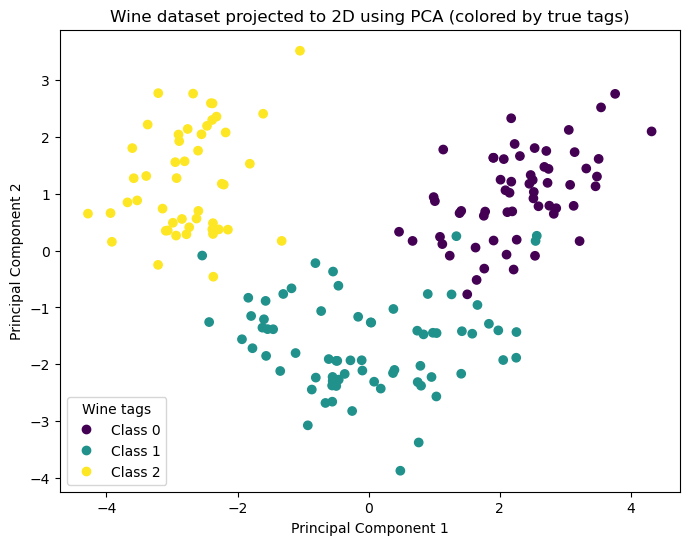

In [4]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
plt.title('Wine dataset projected to 2D using PCA (colored by true tags)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend that maps colors to class IDs
handles, _ = scatter.legend_elements()
labels = [f'Class {i}' for i in np.unique(y)]
plt.legend(handles, labels, title='Wine tags')

plt.show()

## 4) Run K-Means on the 2D PCA representation

### What we're doing
- We run the `k_means_clustering` model from the `k_means_clustering.py` implementation on the `X_2d` data matrix.
- Because Wine has **3** known classes, we set `n_clusters=3`. However, later we will test out what happens with `n_clusters=2` and `n_clusters=4`
- We then visualize the k-means cluster assignments in the same 2D PCA space.

We set `metric='euclidean'`, `max_iter=300`, and `tol=1e-4` for all models.

First we initalize our model with the name `kmeans_2d` and thenw e call `.fit_predict(X_2d)` to produce a vector of labels called `k_labels`. 
`k_labels` is an element-wise assignment of clusters to each row in `X_2d`.
We also print out final cluster centers in the PCA space. 


In [5]:
kmeans_2d = k_means_clustering(
    n_clusters=3,
    metric='euclidean',
    max_iter=300,
    tol=1e-4,
)

k_labels = kmeans_2d.fit_predict(X_2d)

print('Iterations until stop:', kmeans_2d.n_iter_)
print('Cluster centers (in PCA space):')
print(kmeans_2d.cluster_centers_)


Iterations until stop: 7
Cluster centers (in PCA space):
[[ 2.28888211  0.95994724]
 [-0.04083933 -1.74320866]
 [-2.73771147  1.16476397]]


### Visualize the k-means result in PCA space

We plot the same 2D points again, but this time colored by the **cluster IDs** produced by k-means.
We also mark the learned cluster centers.


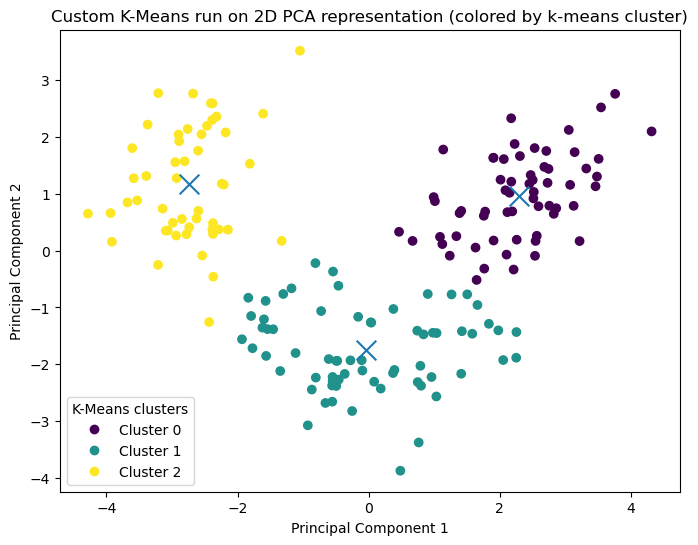

In [6]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=k_labels)
plt.scatter(
    kmeans_2d.cluster_centers_[:, 0],
    kmeans_2d.cluster_centers_[:, 1],
    marker='x',
    s=200,
)
plt.title('Custom K-Means run on 2D PCA representation (colored by k-means cluster)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
labels = [f'Cluster {i}' for i in np.unique(k_labels)]
plt.legend(handles, labels, title='K-Means clusters')

plt.show()

## Now we compare clusters to true tags

K-means is unsupervised, so cluster IDs (0/1/2) won't necessarily match class IDs (0/1/2), but we can still measure how well clustering aligns to true labels using **Adjusted Rand Index (ARI)**.
ARI is permutation-invariant, so it handles label switching correctly.

In [17]:
ari = adjusted_rand_score(y, k_labels)
print('Adjusted Rand Index (ARI):', ari)

Adjusted Rand Index (ARI): 0.8961671105205941


## 5) — k-means with different numbers of clusters

So far we used **3 clusters** because the Wine dataset contains **3 known classes**. Next, we'll repeat the same workflow using **2 clusters** and **4 clusters** to simulate cases where we don't know the true number of cluster.


For each value of `k`, we will:
1. Fit a k-means model on the **2D PCA representation** (`X_2d`).
2. Print the number of iterations and learned cluster centers.
3. Plot the points colored by the **k-means cluster assignments**, with cluster centers marked.
4. Compute **Adjusted Rand Index (ARI)** against the true Wine tags.


## 5a) Run k-means with **2 clusters** 

- We set `n_clusters=2`.
- We fit your k-means on `X_2d` (the PCA-reduced data).
- Then we visualize the result in PCA space.



In [7]:
kmeans_2_clusters = k_means_clustering(
    n_clusters=2,
    metric='euclidean',
    max_iter=300,
    tol=1e-4,
)

k2_labels = kmeans_2_clusters.fit_predict(X_2d)

print('k=2 — Iterations until stop:', kmeans_2_clusters.n_iter_)
print('k=2 — Cluster centers (in PCA space):')
print(kmeans_2_clusters.cluster_centers_)

k=2 — Iterations until stop: 10
k=2 — Cluster centers (in PCA space):
[[-1.86817821 -0.13741631]
 [ 1.95407146  0.1437343 ]]


### Visualize the **k=2** clustering result

Each point is colored by the cluster ID assigned by `kmeans_2_clusters`. The **X markers** show the learned cluster centers in PCA space.

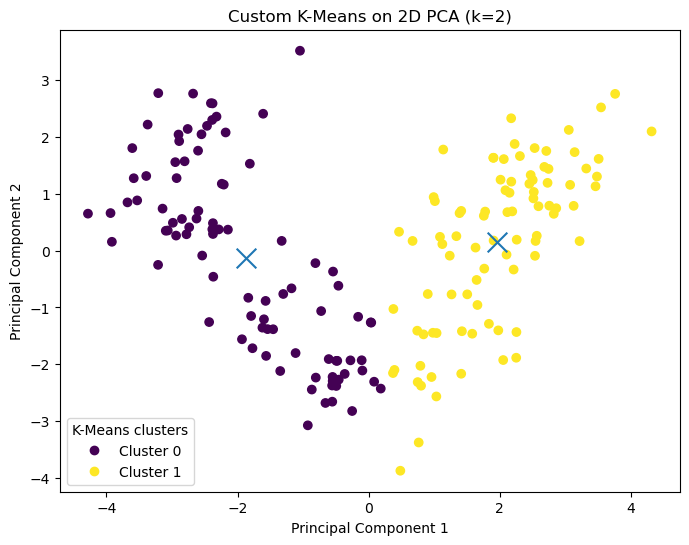

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=k2_labels)
plt.scatter(
    kmeans_2_clusters.cluster_centers_[:, 0],
    kmeans_2_clusters.cluster_centers_[:, 1],
    marker='x',
    s=200,
)
plt.title('K-Means on 2D PCA (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
labels = [f'Cluster {i}' for i in np.unique(k2_labels)]
plt.legend(handles, labels, title='K-Means clusters')
plt.show()

### ARI for **k=2**

This measures how well the 2-cluster solution aligns with the true Wine tags. Because the true labels have 3 classes, ARI will be lower for `k=2`.

In [14]:
ari_k2 = adjusted_rand_score(y, k2_labels)
print('k=2 — Adjusted Rand Index (ARI):', ari_k2)

k=2 — Adjusted Rand Index (ARI): 0.37431449262136857


## 5b) Run k-means with **4 clusters** 

### What we're doing
- We set `n_clusters=4`.
- We fit `k-kmeans_4_clusters` on the same `X_2d` PCA representation.
- Then we plot the assignments and cluster centers.



In [10]:
kmeans_4_clusters = k_means_clustering(
    n_clusters=4,
    metric='euclidean',
    max_iter=300,
    tol=1e-4,
)

k4_labels = kmeans_4_clusters.fit_predict(X_2d)

print('k=4 — Iterations until stop:', kmeans_4_clusters.n_iter_)
print('k=4 — Cluster centers (in PCA space):')
print(kmeans_4_clusters.cluster_centers_)

k=4 — Iterations until stop: 8
k=4 — Cluster centers (in PCA space):
[[-0.10018684 -1.79057318]
 [-2.54660835  2.20687505]
 [-2.8319244   0.42808753]
 [ 2.26614991  0.86559213]]


### Visualize the **k=4** clustering result

This plot is directly comparable to the k=2 and k=3 plots. If k-means creates an extra cluster, it usually shows up as a split region in PCA space.

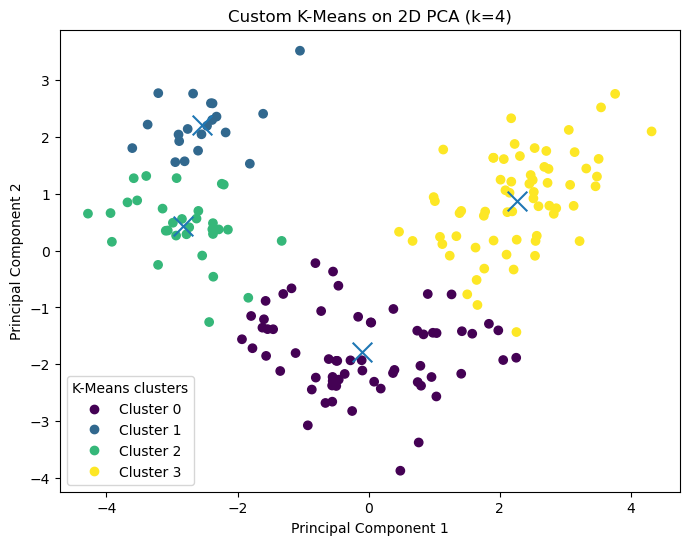

In [11]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=k4_labels)
plt.scatter(
    kmeans_4_clusters.cluster_centers_[:, 0],
    kmeans_4_clusters.cluster_centers_[:, 1],
    marker='x',
    s=200,
)
plt.title('Custom K-Means on 2D PCA (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
labels = [f'Cluster {i}' for i in np.unique(k4_labels)]
plt.legend(handles, labels, title='K-Means clusters')
plt.show()

### ARI for **k=4**

ARI is permutation-invariant, so it can still compare 4 clusters to 3 true classes. However, because the number of clusters differs, interpret ARI carefully: a high ARI suggests the extra cluster is mostly a split within a true class, while a low ARI suggests k-means is mixing classes.

In [16]:
ari_k4 = adjusted_rand_score(y, k4_labels)
print('k=4 — Adjusted Rand Index (ARI):', ari_k4)

k=4 — Adjusted Rand Index (ARI): 0.7862946493387473


## Comparison of ARI Scores Across Different Numbers of Clusters

Comparing the Adjusted Rand Index (ARI) scores across different values of \(k\) highlights how sensitive k-means is to the chosen number of clusters. The ARI is highest for **\(k=3\)**, which aligns with the true number of Wine classes, indicating that k-means best recovers the underlying structure when the correct number of clusters is used. In contrast, **\(k=2\)** underfits by merging distinct classes, while **\(k=4\)** tends to over-segment the data by splitting natural groups, both resulting in lower ARI scores.


In [18]:
print('ARI for 2 clusters:', ari_k2)
print('ARI for 3 clusters:', ari)
print('ARI for 4 clusters:', ari_k4)

ARI for 2 clusters: 0.37431449262136857
ARI for 3 clusters: 0.8961671105205941
ARI for 4 clusters: 0.7862946493387473
